
# BERT: Bidirectional Encoder Representations from Transformers

참고 원본 문서)
https://towardsdatascience.com/a-complete-guide-to-bert-with-code-9f87602e4a11

구글에서 개발, GPT는 생성에 초점을 맞추었다면(NLG, Natural Language Generation) BERT는 이해(NLU, Natural Language Understanding)이 초점이다.

Train 및 Fine Tuning 하는 법을 연구해본다!

# 1. History and Key Features of BERT

- Encoder 만 사용
- Pre-training
- Fine-tuning
- Bidirectional context, 양방향 맥락 파악

## 1.1 Encoder only

**Decoder-Only Models)**
- 생성에 초점을 맞춘 GPT는 decoder-only이다.
- decoder: encoder에서 받은 input을 기반으로 output을 생성한다.
- conversational chatbots, machine translation, code generation

**Encoder-Only Models)**
- 언어를 token 단위로 받아서 numeric vector로 변환시켜준다
- Named Entity Recognition (NER), Sentiment Analysis

즉, 언어를 수치화 하고 이해 및 분석하는데 유용하다.

Attention is all you need에서 소개한 Transformer에서는 encoder decoder 각각 6개였다.

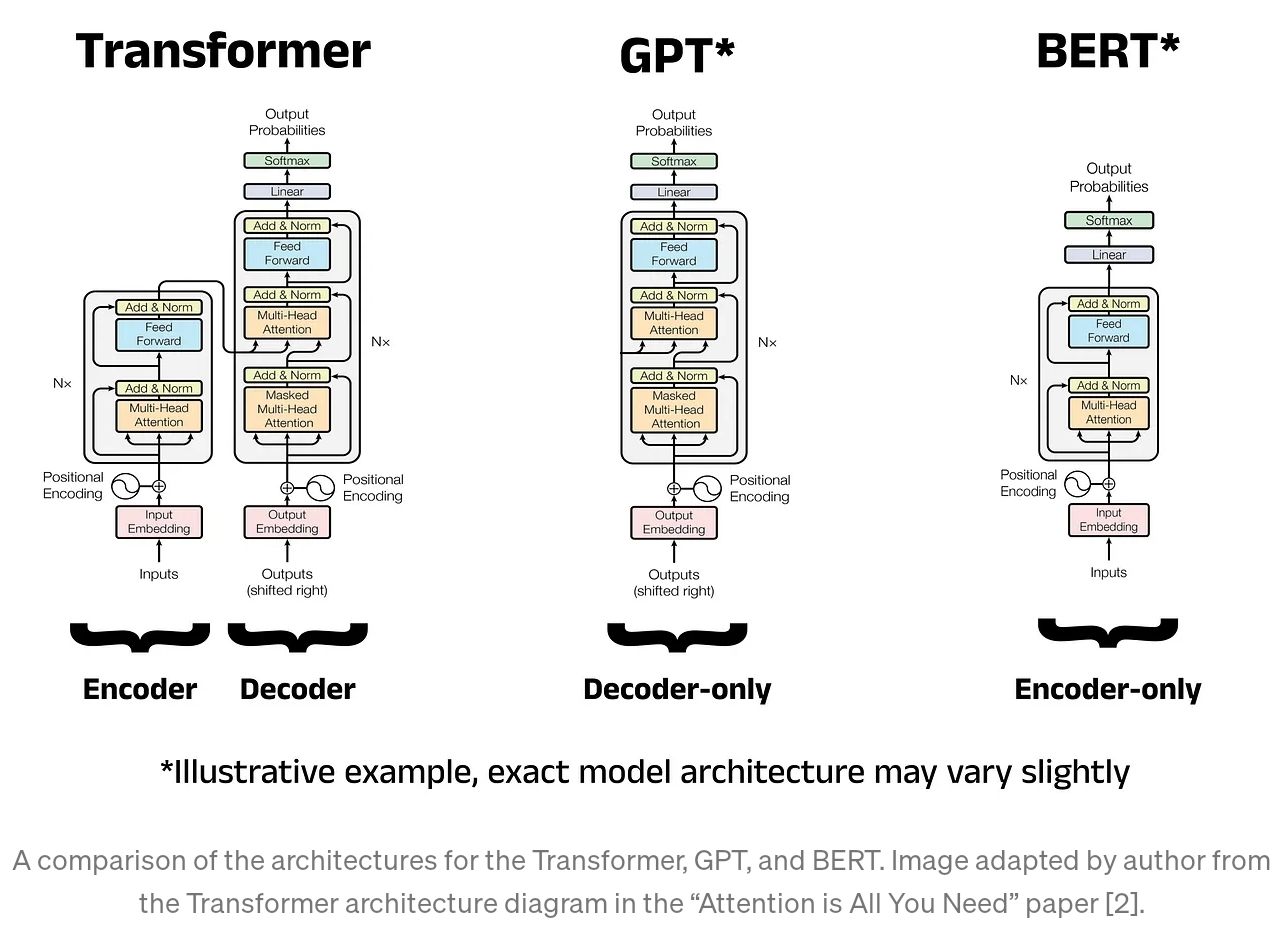

## 1.2 Pre-training Approach

Pre-training 개념은 GPT가 대중화시켰다.

**Pre-training)**
- 언어 전체를 이해하는 task가 정해지지 않은 foundational model을 학습
- 상단 이미지의 linear layer 직전의 요소들로 구성된다.
- 이를 복제해서 특정한 task를 위해서 fine-tuning을 한다.
- fine-tuning: i) 일종의 FFW인 linear layer (classification head 혹은 head)를 train, ii) 모델의 나머지 weights 와 biases는 frozen.
- 즉, fine-tuning은 나머지를 고정하고 linear head를 학습시키는 것이다.
- Multihead attention은 뭘까?

**Analogy, a sentiment analysis task)**
- text를 `positive` 혹은 `negative`로 평가한다.
- 기존에는 하나의 task를 위해서 통째로 새로운 모델을 생성해야하고, 하나의 task 만 해결할 수 있다.
- Pre-training을 한다면 여러 가지의 task에 모델을 적용할 수 있게된다.

## 1.3 Fine-tuning

2018년 이전에는 task별로 새로운 모델을 만들었다.

GPT 같은 generic 모델을 가지고, 특정 task를 위한 classification head만 설정하면 된다 (_"classification head can be changed to contain different number of output neurons"_).


BERT를 활용한 Sentiment Analysis의 경우, `positive`와 `negative`에 해당하는 2개의 output neuron으로 head를 변경하면 된다("head can be changed to feature two output neurons").

10개로 분류하고 싶을 경우, head가 10 output layer에서 10개의 뉴련을 가지도록 변경하면 된다. 이런 식으로 다양한 task를 위해서 foundational model을 가져와서 사용할 수 있다.

**Fine-tuning in BERT)**

- 모델 크기에 따른 2가지 버전: Base 와 Large
- 둘 모두 4일 정도 걸렸는데, Base 는 16개의 TPU, Large는 64개의 TPU를 사용했다.
- 일반적인 연구에서는 비현실적인 수준, n시간 정도만 활용하기 위해서는 기존에 task에 맞는 fine-tuning이 되어있는 모델들을 Hugging Face에서 받아오자.

## 1.4 Bidirectional Context

모든 언어 모델이 그렇듯, BERT는 언어 모델로서 이전 단어를 기반으로 이후에 나올 단어들의 확률을 추정한다.  
하지만, 이 확률을 어떻게 활용하는지에 따라서 모델의 task에 맞는 행위가 정해진다.

GPT의 경우 시퀀스를 따라올 다음 단어를 예측하는 것을 학습하고, sentiment analysis를 예로 들 경우 `positive`나 `negative`와 같은 sentiment를 예측한다.

언어에 대해 유의미한 예측을 하기 위해서는 맥락에 대한 이해를 전제로 한다.
NLU의 경우 특히 더 그렇다.  
BERT는 이를 Bidirectionality로 확보한다.

BERT가 NLU task에서 높은 성능을 보이는 이유는 encoder-only 구조와 함계 bidirectionality이다.
Transformer encoder의 self-attention도 bidirection 맥락을 연산하지만, decoder가 unidirectional context를 기반으로 생성하기 때문에 BERT에 비해 language representation보다 떨어지게 된다.

한마디로 BERT가 구조상 분석에 더 특화되어있다.

**Bidirectionality의 정의)**

- input sequence의 단어에 대해 전 후 단어 모두로부터 맥락을 유추할 수 있다 (left context & right context).
- _"attention 메커니즘이 각 단어에 대해 전후의 token에 attend 할 수 있다" ("attention mechanism can attend to the preceding and subsequent tokens for each word")_
- 오직 input 내의 단어들에 대해 예측을 수행하기 때문에, 주변 모든 단어들로부터 맥락적 단서를 학습할 수 있다, bidrectional.

- GPT의 경우 decoder에서 생성할 때 아직 생성이 안된 단어들을 참고할 수는 없으므로(right context), left context만 참고하게 된다.

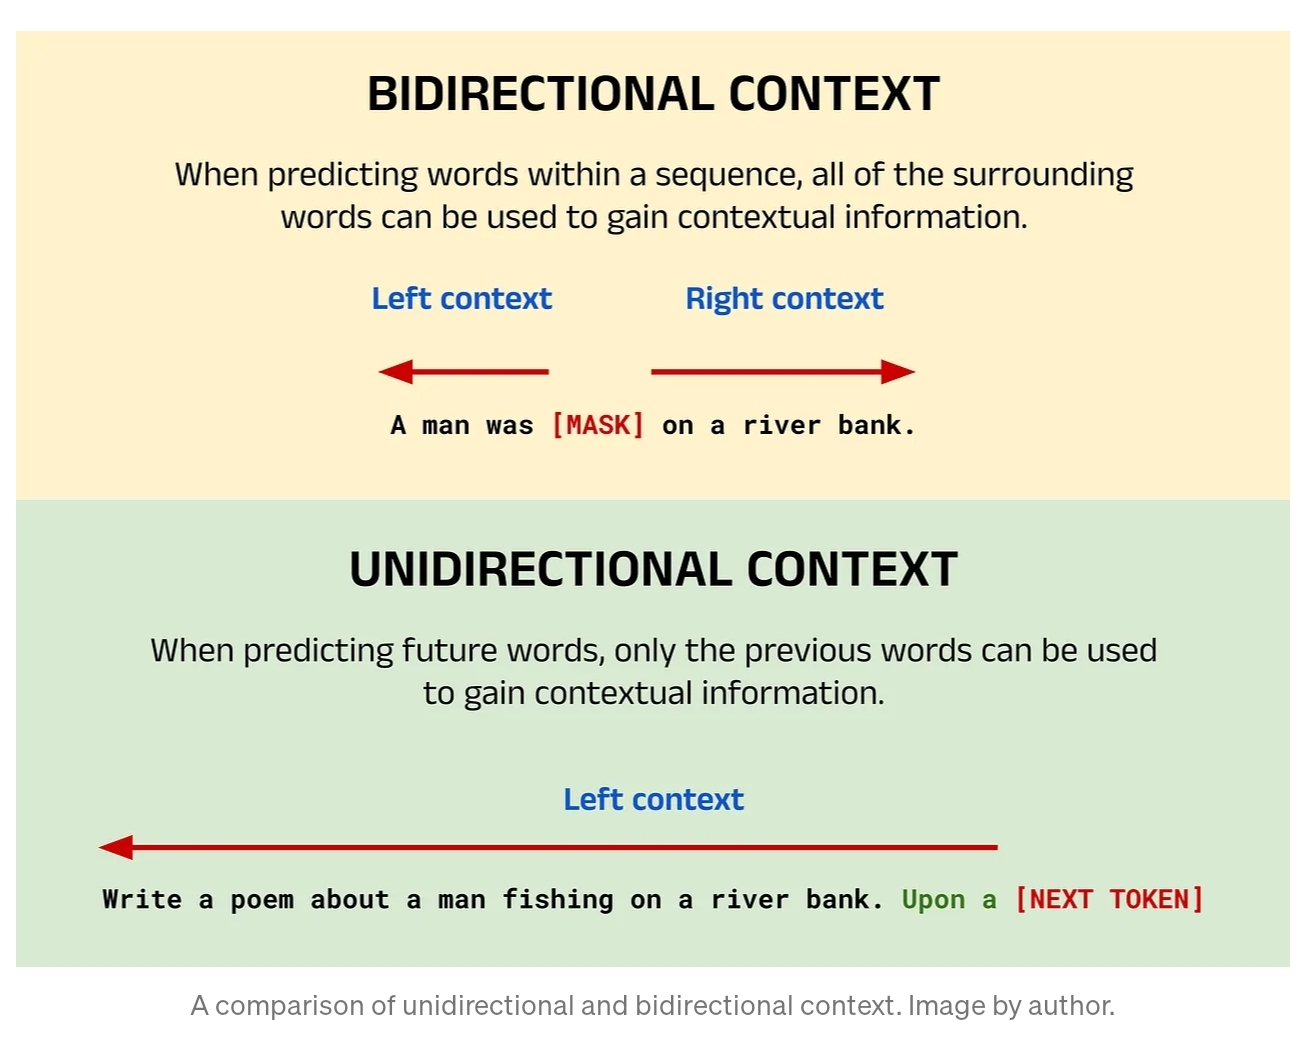

- 즉, BERT는 mask로 가린 부분에 대해 좌우의 맥락을 고려하여 단어를 예측한다.
- GPT는 이전 단어들을 기반으로 다음에 확률이 가장 높은 단어를 예측한다.

## 1.5 BERT의 한계

Bidrectional model로서 2가지 주요 한계가 있다.

**i) 긴 학습시간**

맥락 파악 능력에 있어서는 unidirectional한 기존 모델들에 대해 완전 상위호환이라고 여겨지지만, 동일한 학습시간에 대해 GPT 등이 더 큰 모델을 학습할 수 있다.

**ii) 저조한 생성 성능**

prompt를 받지 않는다. GPT에 비해 구조적으로 문장 생성능력이 낮다.

# 2 구조와 사전학습(pre-training) 목표 설정

## 2.1 BERT 사전학습 목표 개요
Bidirectional모델을 학습시키기 위해서는 left & right context 모두를 예측에 활용할 수 있는 task가 요구된다.

2개 목표: Masked Language Model task(MLM), Next Sentence Prediction task (NSP)

## 2.2 Masked Language Model

**MLM 개요)**
- 15% 정도의 단어를 masking, BERT가 이를 예측하게 만들었다.
- 단어들을 `[MASK]` 토큰으로 대체, 위 예시에서 `fishing`을 예측하는 등  


 **Pre-training(사전학습)과 Fine-tuning의 괴리감 완화)**

- 실제 live 데이터에서는 `[MASK]` 토큰이 존재하지 않는다
- 15%의 단어의 위치를 랜덤으로 정하고, masking할 때 80%는 `[MASK]`, 10%는 임의의 토큰, 10%는 변경하지 않은 상태로 두었다.
- 추정컨대, 15%의 단어에 위와 같은 masking이 적용되었다는 사실을 BERT가 알게 한 거 같다.

**예측된 단어와 실제 단어 간에 오차 계산)**
- BERT Base와 BERT Large 2개 모델 모두 512 token까지만 input sequence로 받았다. 512개 보다 token 개수가 적을 경우 `[PAD]`로 512개로 맞추었다.
- output 토큰의 개수도 정확히 512개
- input에서 i번째 토큰이 masking 되었을 경우, output의 i번째 토큰이 예측된 토큰이다.
- 즉, 오차 계산에 있어서는 다른 모든 토큰이 무시되고 input과 output의 i번째 토큰 간의 오차만 모델의 weight과 bias를 조정하는데 사용된다.
- Cross Entropy Loss (Negative Log Likelihood) loss function으로 오차 계산

## 2.3 Next Sentence Prediction (NSP)

BERT의 두번째 사전학습 목표는 NSP, 문장 등에서 논리적으로 다른 segment를 따라오는 segment를 분류한다.

NSP를 사전학습 목표로 선택한 이유는 MLM을 보완하고, BERT의 NLU 성능을 강화하기 위해서이다.

_"답변 생성(Question Answering)과 자연어 추정(Natural Language Inference)과 같은 후속 과제는 두 문장 간의 관계를 파악하는 것을 기반으로 하는데, 이는 언어 모델링으로는 직접 학습되지는 않는다"_

NSP에 대한 사전학습을 통해 BERT는 산문의 문장 간 흐름을 파악하고 다음과 같은 NLU 문제에 접근할 수 있게된다
- 의역에서의 문장 관계 (sentence pairs in paraphrasing)
- 가설-전제 관계 (hypothesis-premise pairs in entailment)
- 지문-질문 관계 (question-pasage pairs in question answering)

**BERT에 NSP 적용)**

- NSP input: `[SEP]` 토큰으로 구분되는 2개 segments: A, B.
- NSP와 무관하게 BERT는 형식상 input sequence의 끝에 항상 `[SEP]`가 온다.
- WordPiece tokenizer가 모든 input의 끝네 `[SEP]`를 붙인다.
- NSP 분류 문제: A가 논리적으로 B로부터 도출되면 `IsNext`, 도출되지 않는다면 `NotNext`를 output으로 출력한다.
- 단일 언어 데이터베이스 혹은 말뭉치(monolingual corpus)에서 50%는 이어진 2개 문장, 나머지 50%는 임의의 문장을 연결하는 등으로 train data를 만들 수 있다.

## 2.4 BERT Input Embeddings

3개 단계: positional encoding, segment embedding, token embedding

**Positional Encoding)**

- Transformer 처럼 각 토큰에 대해 위치 정보(positional information)가 embedding에 입력된다.
- 단, Transformer와 달리 positional encoding이 함수로 생성되는 것이 아니라 고정되어있다.
- BERT는 512개 토큰으로 input seqeunce가 제한된다.

**Segment Embedding)**
- 각 토큰이 속해 있는 segment 정보를 벡터로 입력한다.
- MLM 사전학습 등 non-NSP 과제의 segment (NSP와 달리 하나의 `[SEP]` 밖에 없다)의 토큰은 segment A라고 입력될 것이다
- 두번째 `[SEP]`가 존재하는 NSP 과제의 segment들에서는, `[SEP]` 다음의 토큰들이 segment B로 표시된다.

**Token Embedding)**
- 기존 Transformer와 동일
- 각 토큰의 학습된 embedding이 위치(positional)와 segment 벡터에 더해진다.
- 최종 embedding을 위해 BERT의 self-attention 을 통과
- 맥락에 대한 정보를 도출해낸다.

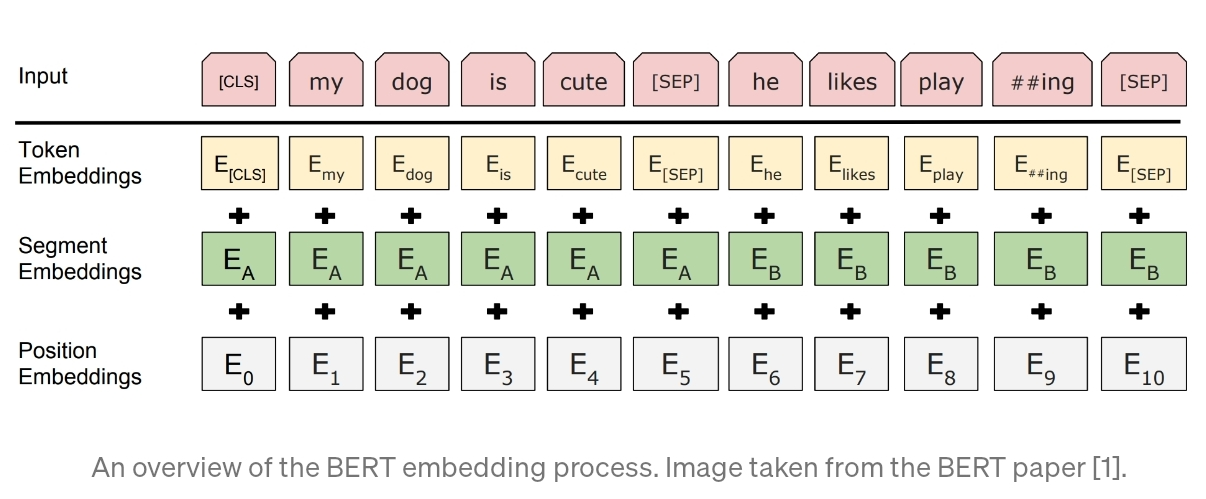

## 2.5 Special Tokens

위 이미지를 보면 `[CLS]`(classification)라는 토큰이 전치된 것을 확인할 수 있다.

전체 input sequence에 대해 요약된 의미를 저장한 토큰.  
classification 과제에 도움을 준다.
Sentimental Analysis에 사용할 경우 마지막 layer에 있는 `[CLS]` 토큰이 `positive`와 `negative`를 예측하기 위해 사용될 수 있다.

이런식으로 GPT에는 없고 BERT에만 존재하는 5가지의 special token들이 있다.

**Special Tokens의 종류)**
- `[PAD]` (token ID:`0`) -- input sequence를 512개로 맞추기 위해 사용됨
- `[UNK]` (token ID:`100`) -- BERT의 단어 목록에 없는 토큰
- `[CLS]` (token ID: `101`) -- classification을 위한 정보를 저장한 토큰. 사용되든 안되든 매 sequence의 시작에 항상 위치한다.
- `[SEP]` (token ID: `102`) -- NSP 등, 하나의 input sequence를 segment 단위로 구분할 때 사용됨. sequence의 끝에 항상 하나는 있다.
- `[MASK]` (token ID: `103`) -- MLM 매스킹된 토큰, inference on a masked sequence에도 사용됨.

## 2.6 BERT Base 와 BERT Large 모델 구조 비교

**공통점 및 개요)**
- 둘 다 WordPiece tokenizer를 사용한다.
- Sequence는 512개의 token으로 이루어짐
- BERT의 어휘는 30522개, 그 중 대략 1000개는 미사용 (빈칸) 된다.
- 이는 전체 모델을 다시 train할 필요 없이, 사용자가 원하는 어휘로 채울 수 있다.
- "domain-specific vocabulary"을 위한 공간
- 기존 Transformer에 비해, embedding dimension(d_model)이 높다.
- 이는 각 모델의 학습된 어휘 집합 속의 토큰에 해당하는 벡터의 크기에 달려있다.
- BERT Base 는 d_model = 768, BERT Large는 d_model = 1024
- 기존 Transformer는 d_model = 512이다.

**차이점)**
- Encoder 블록의 개수 차이: `N`으로 나타낸다.
- Encoder 블록 별 attention head의 개수: attention head가 input sequence에 대해 contextual vector embedding을 계산한다. BERT는 Multi-head attention을 사용하므로, 정확히는 encoder layer 별 head의 개수를 의미한다.
- Feedforward Network에서 은닉층(hidden layer)의 크기: BERT의 head, linear layer의 은닉층은 정해진 개수의 노드들(BERT Base는 3072개)로 이루어진다. linear layer는 마지막 softmax 등의 layer로 Feedforward한다.
- output layer의 크기는 class의 개수에 달려있다. Binary classification 이면 2개 output neuron, multi-class면 class의 개수만큼 등등


### **새싹을 위한 참고 사항)**
회귀모델을 만들고 싶다면, output layer만 softmax와 같은 classification head 대신 regression head로 교체하면 된다. 혹은, 그냥 linear layer만 남기면 그게 연속적인 값을 출력하는 linear regression 모델이 된다.

다시 차이점으로 돌아가서,

- weight와 bias의 총 개수, 수백만개씩 있다.

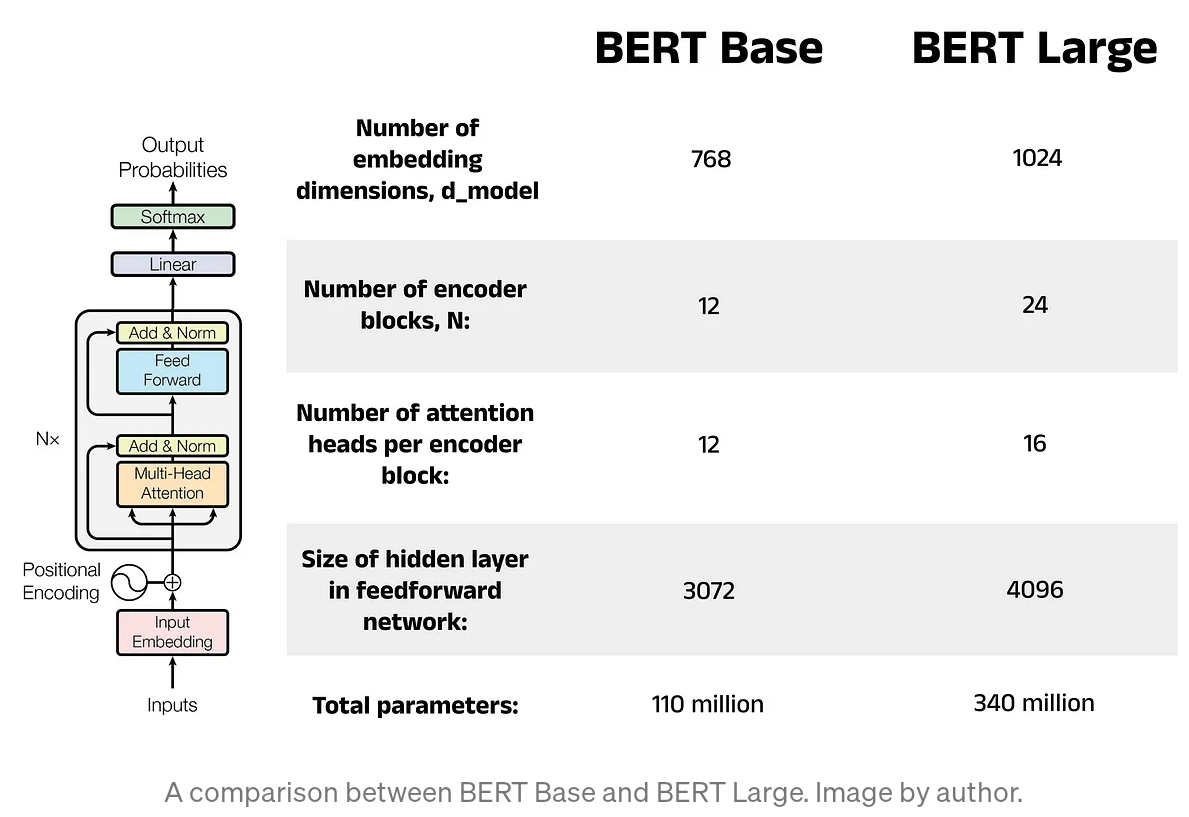

# 3. Fine-Tuning BERT for Sentiment Analysis

- BERT 모델을 실제 sentiment analysis 예시에 적용
- task-agnostic fine-tuning 방식, python class 생성
- 해당 class를 이용해 Sentiment Analysis용으로 객체 생성
- Question Answering, Named Entity Recognition 등, 다양한 task에 맞춰서 class를 재사용 가능하다.

## 3.1 Fine-Tuning 데이터셋 로드 및 전처리

- 스탠포드에서 제공하는 `positive`와 `negative`로 라벨링된 50000개의 온라인 영화 리뷰 데이터셋 (IMDb), 온라인에 있음

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\PHY\Desktop\test\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


이전 NLP 모델들과 달리, BERT와 같은 Transformer 기반 모델들은 전처리를 최소화한다.

그 자체로는 의미를 갖지 않는 불용어(is, in, 이, 저, 그리고 등) 없애는 것이 오히려 성능을 낮추기도 한다.

다만 형식과 오류 문자 등은 제거해 줘야 한다.

IMDb 데이터셋을 확인해보니 `<br/>`과 같은 줄바꿈 태그가 들어있는 것을 확인할 수 있다.

In [2]:
# html <br /> 제거
df['review_cleaned'] = df['review'].apply(lambda x: x.replace('<br />', ''))

# 공백제거
df['review_cleaned'] = df['review_cleaned'].replace('\s+', ' ', regex=True)

# 2번째 리뷰의 72 클리닝 전후 비교
print('Before cleaning:')
print(df.iloc[1]['review'][0:72])

print('\nAfter cleaning:')
print(df.iloc[1]['review_cleaned'][0:72])

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\PHY\AppData\Local\Temp\ipykernel_4176\971515646.py:5: SyntaxWarning: invalid escape sequence '\s'
  df['review_cleaned'] = df['review_cleaned'].replace('\s+', ' ', regex=True)


Before cleaning:
A wonderful little production. <br /><br />The filming technique is very

After cleaning:
A wonderful little production. The filming technique is very unassuming-


**Encode the Sentiment)**

- 전처리의 마지막 단계로 `negative`에 0을 할당해주고 `positive`에 1을 할당해주었다.

- classification head를 train하는 데에 필요하다

In [3]:
df['sentiment_encoded'] = df['sentiment'].\
    apply(lambda x: 0 if x == 'negative' else 1)

df.head()

,review,sentiment,review_cleaned,sentiment_encoded
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...",1


# 3.2 Tokenize the Fine-Tuning Data

- 전처리가 완료되었다면 이제 fine-tuning용 데이터를 tokenizing 할 수 있다.

- i) 리뷰를 token들로 쪼갠다
- ii) BERT가 요구하는 `[CLS]` `[SEP]`와 같은 special token 추가 (GPT는 필요로 하지 않는다)
- iii) padding, 아마 `[PAD]`로 512개 sequence 길이 맞추기
- Hugging Face의 `transformers` 라이브러리에 있는 `BertTokenizer` 클래스를 활용한다

- tokenizer 참고 링크: https://medium.com/@bradneysmith/tokenization-llms-from-scratch-1-cedc9f72de4e

**`transformers` 라이브러리 설명)**
- `from_pretrained`를 활용해서 Hugging Face에서 원하는 tokenizer (이미 pre-trained된 모델들도 있다) 모델을 가져오면 된다.

**BERT를 위한 구글의 pre-trained tokenizer 4가지)**

- `bert-base-uncased` : 대문자 소문자를 구분하지 않는 좀 더 작은 BERT 모델이다.

- `bert-base-cased` : 대문자 소문자를 구분한다

- `bert-large-uncased` : 큰 BERT 모델이고 대문자 소문자를 구분하지 않는다.

- `bert-large-cased`: BERT-Large이고 대문자 소문자를 구분한다.

알고보면 둘다 같은 어휘 집합을 사용한다. 다른 BERT 모델을 활용할 경우 일관된 tokenizer와 모델 크기를 활용하자.

**대문자 소문자는 언제 구분?)**

- Named Entity Recognition 과 같은 과제에서는 고유명사 등을 찾아내는 것이 목적이다
- 이런 경우에는 대문자가 중요할 수 있다. 예) South Korea

여기서는 단순 영화 리뷰를 보기 때문에 구분하지 않는 모델을 활용한다.

In [4]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
print(tokenizer)

c:\Users\PHY\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}


**Encoding: text -> token -> ID)**

- 각 리뷰는 token ID들로 이루어진 tensor가 된다.

예시) `I liked this movie`

1. 소문자로 변환

2. `bert-base-uncased`를 이용해서tokenization: `['i','liked','this','movie']`

3. special token 추가: `['[CLS]','i','liked','this','movie','[SEP]']`

4. `bert-base-uncased` 어휘 집합에 따라서 각 토큰을 해당 ID로 변환. 예) `[CLS]` -> `101`, `i` -> `1045`

`BertTokenizer`는 위의 과정을 통해 "encoding"을 수행한다.

- token ID 들로 이루어진 tensor를 PyTorch, Tensorflow tensor들이나 numpy array로 출력해줄 수 있다!
- `return_tensors`를 통해 가능하다, `pt`, `tf`, `np`

- hugging face에서는 token ID를 `input ID`라고도 한다.

In [5]:
# 예시 문장 encoding
sample_sentence = 'I liked this movie'
token_ids = tokenizer.encode(sample_sentence, return_tensors='np')[0]
print(f'Token IDs: {token_ids}')

# token ID를 다시 token으로 변환하여 special token이 추가되었는지를 확인
tokens = tokenizer.convert_ids_to_tokens(token_ids)
print(f'Tokens  : {tokens}')

Token IDs: [ 101 1045 4669 2023 3185  102]
Tokens  : ['[CLS]', 'i', 'liked', 'this', 'movie', '[SEP]']


**Truncation & Padding)**

- BERT에서 sequence의 길이는 토큰 512개
- 이를 맞추기 위해 토큰을 지워버리는 truncation, 빈 토큰을 추가하는 padding을 사용한다.

- `encode`함수에서 `truncation = True`로 설정하고 `max_length = 512`로 맞춤으로써 `trunction`을 할 수 있고
- `parameter = max_lenth`로 함으로써 `padding`을 자동으로 추가할 수 있다.

In [6]:
review = df['review_cleaned'].iloc[0]

token_ids = tokenizer.encode(
    review,
    max_length = 512,
    padding = 'max_length',
    truncation = True,
    return_tensors = 'pt')

print(token_ids)

tensor([[  101,  2028,  1997,  1996,  2060, 15814,  2038,  3855,  2008,  2044,
          3666,  2074,  1015, 11472,  2792,  2017,  1005,  2222,  2022, 13322,
          1012,  2027,  2024,  2157,  1010,  2004,  2023,  2003,  3599,  2054,
          3047,  2007,  2033,  1012,  1996,  2034,  2518,  2008,  4930,  2033,
          2055, 11472,  2001,  2049, 24083,  1998,  4895, 10258,  2378,  8450,
          5019,  1997,  4808,  1010,  2029,  2275,  1999,  2157,  2013,  1996,
          2773,  2175,  1012,  3404,  2033,  1010,  2023,  2003,  2025,  1037,
          2265,  2005,  1996,  8143, 18627,  2030,  5199,  3593,  1012,  2023,
          2265,  8005,  2053, 17957,  2007, 12362,  2000,  5850,  1010,  3348,
          2030,  4808,  1012,  2049,  2003, 13076,  1010,  1999,  1996,  4438,
          2224,  1997,  1996,  2773,  1012,  2009,  2003,  2170, 11472,  2004,
          2008,  2003,  1996,  8367,  2445,  2000,  1996, 17411,  4555,  3036,
          2110,  7279,  4221, 12380,  2854,  1012,  

**`encode_plus`로 Attention Mask 이용)**

- 이 상태로는 BERT 모델이 padding도 학습에 사용하는 문제가 발생
- attention mask를 통해 padding을 무시하게 만든다
- `encode_plus` 함수를 이용해서 Batch Encoder를 만들어준다.
- Batch Encoder의 key들)
    - `input_ids` : `encode` 함수와 동일한 토큰 ID
    - `token_type_ids` : 문장을 구분해주는데 사용된 segment ID (`[SEP]`랑은 다르다), 문장 A (id=0), 문장 B (id=1)
    - `attention_mask` : 0 과 1 로 이루어진 list, 0은 무시하고 1은 학습한다.

In [7]:
review = df['review_cleaned'].iloc[0]

batch_encoder = tokenizer.encode_plus(
    review,
    max_length = 512,
    padding = 'max_length',
    truncation = True,
    return_tensors= 'pt')

print('Batch encoder keys:')
print(batch_encoder.keys())

print('\nAttention mask:')
print(batch_encoder['attention_mask'])

Batch encoder keys:
dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

Attention mask:
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1,

**모든 리뷰 Encoding)**

- 모든 리뷰를 encoding하고 그에 대응하는 위와 같은 attention mask를 tensor로 저장한다

In [8]:
import torch

token_ids = []
attention_masks = []

# 각 리뷰 encoding
for review in df['review_cleaned']:
    batch_encoder = tokenizer.encode_plus(
        review,
        max_length = 512,
        padding = 'max_length',
        truncation = True,
        return_tensors = 'pt')

    token_ids.append(batch_encoder['input_ids'])
    attention_masks.append(batch_encoder['attention_mask'])

# token ID와 attention mask list를 PyTorch tensor로 변환
token_ids = torch.cat(token_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim = 0)

## 3.3 Train과 Validation Dataloader 생성

**train과 validation으로 나누기)**
- validation set를 사용하여 fine-tuning을 진행하는 과정에서 성능을 모니터링할 수 있다.
- 모델이, 여기서는 모델의 classification head가 각 epoch(train data 전체를 모델이 한번 사용)를 학습할 때마다 loss가 줄어들어야 한다
- fine-tuning을 위해서는 2~4회를 추천한다.
- sklearn의 `model_selection` 속의 `train-test-split`를 사용한다.
- shuffle도 할 수 있지만, 모델의 재현성을 위해 False로 설정
- 여기서는 `test_size`의 적절한 크기를 0.1로 판단했다

**PyTorch DataLoader)**
- train과 validation 텐서들을 묶어서 PyTorch TensorDatasets를 만든다
- Dataset를 batch로 나눠서 PyTorch DataLoader class를 생성해준다.
- batch size 는 16 혹은 32를 추천한다 (이 개수만큼의 리뷰를 보고 해당하는 sentiment를 확인 한 뒤에 weight와 bias를 재계산한다)
- DataLoader를 사용하면 여러 CPU 코어를 사용하는 병렬 연산을 통해 효율적으로 데이터를 로드할 수 있게된다!

In [9]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

val_size = 0.1

# token ID들을 분할한다
train_ids, val_ids = train_test_split(token_ids, test_size=val_size, shuffle=False)

# attention mask들 분할
train_masks, val_masks = train_test_split(attention_masks, test_size=val_size, shuffle=False)
# 애초에 이렇게 따로 할 거면, attention mask 순서 때문에 shuffle 못하는 거 아닌가?
# 같이 하면 shuffle 가능

# label 분할
labels = torch.tensor(df['sentiment_encoded'].values)
train_labels, val_labels = train_test_split(labels, test_size=val_size, shuffle=False)

# DataLoader 생성
# 여기서는 섞어야 매번 학습 할 때마다 순서를 바꿔서 학습한다
train_data = TensorDataset(train_ids, train_masks, train_labels)
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=16)
val_data = TensorDataset(val_ids, val_masks, val_labels)
val_dataloader = DataLoader(val_data, batch_size = 16)

## 3.4 BERT 모델 생성

Fine-tuning을 하기 위해 사전 학습된 BERT모델을 로딩한다.
Tokenizer처럼 Hugging Face에서 가져올 수 있다.
classification head가 이미 붙어 있는 다양한 버전의 BERT가 있다.
- `BertForMaskedLM`
- `BertForNextSentencePrediction`
- `BertForSequenceClassification`
- `BertForMultipleChoice`
- `BertForMultipleChoice`
- `BertForTokenClassification`
- `BertForQuestionAnswering`

헤드가 없는 BERT모델을 불러와서 적절한 classification head를 PyTorch나 Tensorflow로 붙일 수도 있다.

여기서는 이미 classification을 위해 필요한 linear layer가 이미 붙어있는 `BertForSequenceClassification`을 사용한다.

BERT Base가 768 embedding dimension을 사용하므로, hidden layer도 마지막 encoder block과 연결된 768개의 노드를 가진다.

- `num_labels`: output neuron의 개수, unique sentiment label의 개수이기도 하다
- `IMDb`는 `positive`와 `negative` 2가지 이므로 `num_labels = 2`이다
- label의 개수에 따라 (정확히는 데이터에서 구할 수 있는 종속 변수의 개수에 따라) num_labels를 추가할 수 있다.

# Note

만약 headless 모델에 linear layer를 추가하는 것을 보고 싶다면, Hugging Face transformers에서 `modelling_bert.py`를 보면 된다. `__init__` 함수를 통해 각 class에 linear layer가 더해진다.

In [10]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

c:\Users\PHY\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\PHY\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

## 3.5 Optimizer, Loss 함수, Scheduler 생성

**Optimizer)**

classification head는 batch단위로 된 training data로 weight와 bias를 업데이트 한다. 이를 최적화된 수치로 수렴시키기 위해 각 weight와 bias의 변화량을 계산하는 것이 PyTorch의 `optim` 패키지에 있는 optimizer이다.

Hugging Face는 AdamW optimizer를 사용한다.

**Loss Function)**

- PyTorch의 `nn` 패키지에 있다
- language model에서는 주로 cross entropy에서 불러온다 (negatice log likelihood function이라고도 불린다.)

**Scheduler)**

- learning rate라는 파라미터를 사용해서 변화량의 크기를 지정한다.
- 초반에는 변화량이 큰 것이 큰 규모의 조정에 유리할 수 있다.
- weights랑 bias가 조정될 수록 작은 변화량이 필요하다.

In [11]:
from torch.optim import AdamW
import torch.nn as nn
from transformers import get_linear_schedule_with_warmup

EPOCHS = 2

optimizer = AdamW(model.parameters())

loss_function = nn.CrossEntropyLoss()

# Scheduler
num_training_steps = EPOCHS * len(train_dataloader)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

## 3.6 Fine-Tuning 루프

**CUDA 사용)**

In [12]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

Training Process는 outer loop와 inner loop, 2개 루프로 이루어진다

- outer loop: 각 epoch에 대해 process 반복
- inner loop: loss 계산과 optimization를 batch 마다 반복한다.

"code for the training loop has been adapted from this fantastic post by Chris McCormick and Nick Ryan"

**epoch)**

1. 모델 객체를 `train` 함수로 train 모드로 전환
- evaluation 모드와 차이 존재
- batchnorm과 dropout layer를 사용할 때 특히 유용하다
- `BertForSequenceClassification` 도 classification head에 dropout 층을 포함하므로, train과 evaluation 모드를 전환하는 것이 더욱 중요하다
- "batchnorm과 dropout과 같은 layer들은 train 할 때만 활성화 시킨다."

2. 각 epoch 마다 training loss를 0으로 설정한다. 각 epoch의 loss 증감율을 판단하기 위해서이다.

**batch)**

training data를 batch 단위로 쪼개고, 각 batch에 대해 train을 반복한다.

3. token Id, attention mask, label을 GPU로 옮긴다

4. `zero_grad` 함수로 전 iteration에서 계산된 gradient를 루프마다 리셋한다.
- RNN 등의 모델에서는 이처럼 gradient을 리셋하는 과정이 필요하다

5. batch를 모델로 통과 시켜서 logit(현재의 weight와 bias로 나오는 예측치) 과 loss를 계산한다.

6. total loss를 증가시킨다. loss가 PyTorch tensor 형태이므로, `item` 함수로 float를 추출한다.

7. backward pass(역전파)를 수행하고 loss를 classifier head로 propagate(전파)한다.
- weight와 bias에 적용될 조정을 결정한다.

8. exploding gradient문제를 막기 위해 gradient을 1.0하로 clip한다.

**batch 학습 이후)**

10. 평균 loss와 학습에 소요된 시간을 계산한다.

In [13]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [14]:
for epoch in range(0, EPOCHS):

    model.train()
    training_loss = 0

    for batch in train_dataloader:

        batch_token_ids = batch[0].to(device)
        batch_attention_mask = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model.zero_grad()

        loss, logits = model(
            batch_token_ids,
            token_type_ids = None,
            attention_mask=batch_attention_mask,
            labels=batch_labels,
            return_dict=False)

        training_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    average_train_loss = training_loss / len(train_dataloader)

c:\Users\PHY\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


KeyboardInterrupt: 

- validation step은 outer loop, 평균 validation loss가 epoch 별로 계산된다.
- epoch이 진행되면서 validation loss가 줄어들고 classifier accuracy가 증가해야 한다.

**epoch 별 Validation 단계)**

11. `eval`을 통해 모델을 evaluation 모드로 바꾼다
- dropout layer가 비활성화 된다.

12. validation loss를 0으로 설정한다.
- 학습이 성공적이라면 epoch별 loss가 줄어들어야 한다.

13. validation data를 batch로 쪼갠다

**각 batch)**

14. tokenID, attention mask, label 들을 GPU로 옮긴다.

15. `no_grad` 메서드를 호출해서 gradient 연산을  막는다.
- 여기서는 optimization등 없이 inference만 수행한다.

16. batch를 모델 돌려서 logit(예측치) 과 loss 계산.

17. logit과 label을 모델로부터 추출해서 CPU로 옮긴다.

18. validation dataloader의 true label과의 비교를 통해 loss를 더해주고 정확도를 계산한다.

19. 평균 loss와 정확도를 계산해준다.

In [ ]:
def calculate_accuracy(preds, labels):
    """validation set과의 비교로 정확도 계산
    Parameters:
        preds (np.array): 모델이 추측한 label
        labels (np.array): 실제 label

    Returns:
        accuracy(float): 정확도
    """
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    accuracy = np.sum(pred_flat == labels_flat) / len(labels_flat)

    return accuracy

In [ ]:
model.eval()
val_loss = 0
val_accuracy = 0

for batch in val_dataloader:

    batch_token_ids = batch[0].to(device)
    batch_attention_mask = batch[1].to(device)
    batch_labels = batch[2].to(device)

    with torch.no_grad():
        (loss, logits) = model(
            batch_token_ids,
            attention_mask = batch_attention_mask,
            labels = batch_labels,
            token_type_ids = None,
            return_dict=False)

    logits = logits.detach().cpu().numpy()
    label_ids = batch_labels.to('cpu').numpy()
    val_loss += loss.item()
    val_accuracy += calculate_accuracy(logits, label_ids)

average_val_accuracy = val_accuracy / len(val_dataloader)

**상단 코드의 `calculate_accuracy`)**

- validation set에 대한 모델의 정확성은 맞은 예측 비율에 달려있다.
- 예측치인 `logits`에 Numpy의 `argmax`를 통해 가장 큰 값의 index를 출력한다.
- 예) `I liked this move`의 logit이 확률로 각각 `[0.08, 0.92]`라고 한다면, `argmax`는 `positive`에 해당하는 index인 1을 반환한다.
- label 1을 3.3에서 정의한 valid set의 Tenso인 `labels`와 비교한다.
- 16개의 리뷰, `logits`는 16개의 확률 list를 갖고 있다.
- 맞춘 개수를 `val_accuracy`에 저장 후에 전체 리뷰의 개수로 나눠준다.

## 3.7 Fine-Tuning 마무리

이제 끝났다. 상단의 코드를 이제 하나의, 아무 NLP task에 사용가능한 BERT 모델을 하단에 정리한다.

데이터 전처리는 알아서 해라

**정서 분석을 위한 IMDb 데이터 전처리 함수**

In [ ]:
def preprocess_dataset(path):
    """불필요한 character 제거하고 sentiment label encoding.
    IMDb 데이터셋은 HTML break tag를 갖고 있다.
    'review'는 클리닝하고 'sentiment'는 0과 1로 정리한다.
    """

    df_dataset = pd.read_csv(path)

    df_dataset['review_cleaned'] = df_dataset['review'].\
        apply(lambda x: x.replace('<br />', ''))

    df_dataset['review_cleaned'] = df_dataset['review_cleaned'].\
        replace('\s+', ' ', regex=True)

    df_dataset['sentiment_encoded'] = df_dataset['sentiment'].\
        apply(lambda x: 0 if x == 'negative' else 1)

    return df_dataset

**범용 Fine-tuning Class)**

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.utils.data import TensorDataset, DataLoader
from transformers import (
    BertForSequenceClassification,
    BertTokenizer,
    get_linear_schedule_with_warmup)

class FineTuningPipeline:

    def __init__(
            self,
            dataset,
            tokenizer,
            model,
            optimizer,
            loss_function = nn.CrossEntropyLoss(),
            val_size = 0.1,
            epochs = 4,
            seed = 42):

        self.df_dataset = dataset
        self.tokenizer = tokenizer
        self.model = model
        self.optimizer = optimizer
        self.loss_function = loss_function
        self.val_size = val_size
        self.epochs = epochs
        self.seed = seed

        if torch.cuda.is_available():
            self.device = torch.device('cuda:0')
        else:
            self.device = torch.device('cpu')

        #fine tuning
        self.model.to(self.device)
        self.set_seeds()
        self.token_ids, self.attention_masks = self.tokenize_dataset()
        self.train_dataloader, self.val_dataloader = self.create_dataloaders()
        self.scheduler = self.create_scheduler()
        self.fine_tune()

    def tokenize(self, text):
        """input text를 Tokenize하고 tokenID와 attention mask를 출력한다

        토큰 길이는 정확히 512개로 제한된다.
        truncation과 padding을 활용한다.
        tensor 차원은 1 * 512이다.
        """

        batch_encoder = self.tokenizer.encode_plus(
            text,
            max_length = 512,
            padding = 'max_length',
            truncation = True,
            return_tensors = 'pt')

        token_ids = batch_encoder['input_ids']
        attention_mask = batch_encoder['attention_mask']

        return token_ids, attention_mask

    def tokenize_dataset(self):
        """fine_tuning 데이터셋 전체를 self.tokenize 한다"""

        token_ids = []
        attention_masks = []

        for review in self.df_dataset['review_cleaned']:
            tokens, masks = self.tokenize(review)
            token_ids.append(tokens)
            attention_masks.append(masks)

        token_ids = torch.cat(token_ids, dim = 0)
        attention_masks = torch.cat(attention_masks, dim = 0)

        return token_ids, attention_masks

    def create_dataloaders(self):
        """train과 validation set을 위해 dataloaders 생성

        9 대 1의 비율로 쪼갠다. dataloader에 사용될 "sentiment_encoded" 칼럼을 tensor로 변환한다.
        """

        train_ids, val_ids = train_test_split(
                        self.token_ids,
                        test_size=self.val_size,
                        shuffle=False)

        train_masks, val_masks = train_test_split(
                                    self.attention_masks,
                                    test_size=self.val_size,
                                    shuffle=False)

        labels = torch.tensor(self.df_dataset['sentiment_encoded'].values)
        train_labels, val_labels = train_test_split(
                                        labels,
                                        test_size=self.val_size,
                                        shuffle=False)

        train_data = TensorDataset(train_ids, train_masks, train_labels)
        train_dataloader = DataLoader(train_data, shuffle=True, batch_size=16)
        val_data = TensorDataset(val_ids, val_masks, val_labels)
        val_dataloader = DataLoader(val_data, batch_size=16)

        return train_dataloader, val_dataloader

    def create_scheduler(self):
        """learning rate를 위한 선형 scheduler

        0 부터 최대, 다시 최대부터 0까지 감소하는 형태
        하단 hugging face 예시를 기반으로 num_warmup_steps = 0으로 설정

        https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L308

        scheduler에 대한 추가 정보:

        https://huggingface.co/docs/transformers/main_classes/optimizer_schedules#transformers.get_linear_scheduel_with_warmup
        """

        num_training_steps = self.epochs * len(self.train_dataloader)
        scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=0,
            num_training_steps=num_training_steps)

        return scheduler

    def set_seeds(self):
        """시드 생성"""

        np.random.seed(self.seed)
        torch.manual_seed(self.seed)
        torch.cuda.manual_seed_all(self.seed)

    def fine_tune(self):
        """BERT 모델의 classification head를 학습

        Training)

        각 epoch 마다 평균 training loss와 평균 validation loss를 저장할 dict 생성
        시간도 저장, 각 epoch 마다 모델을 학습시킬 loop 생성

        Epoch)

        모델을 train mode로 전환 (batchnorm이나 dropout layer가 활성화된다)
        epoch의 시작마다 training loss = 0로 설정
        학습이 성공적이라면 각 epoch의 loss가 점점 줄어든다
        시간도 저장하고, training data를 batch로 쪼갠 다음 각 batch에 대해 train을 루프한다

        Batch)

        token ID, attention mask, label을 GPU로 옮긴다
        이전 iteration의 gradient을 zero_grad로 리셋한다.
        batch를 모델에 넣고 logit과 loss 계산
        total loss에 더해주고 텐서로 반환
        모델에 역전파하고 전파를 통해서 loss를 classifier head에 전파해서 weight와 bias 조정
        gradient을 최대 1로 clip
        optimizer 사용
        logits와 labels를 추출해서 CPU로 옮긴다
        loss 증가시키고 맞은 예측에 대해 validation dataloader와 비교해서 정확도 계산
        평균 loss와 정확도 계산하고 dictionary에 추가해준다
        """

        loss_dict = {
            'epoch' : [i+1 for i in range(self.epochs)],
            'average training loss': [],
            'average validation loss': []
        }

        t0_train = datetime.now()

        for epoch in range(0, self.epochs):

            self.model.train()
            training_loss = 0
            t0_epoch = datetime.now()

            print(f'{"-"*20} Epoch {epoch+1} {"-"*20}')
            print('\nTraining:\n---------')
            print(f'Start Time:       {t0_epoch}')

            for batch in self.train_dataloader:

                batch_token_ids = batch[0].to(self.device)
                batch_attention_mask = batch[1].to(self.device)
                batch_labels = batch[2].to(self.device)

                self.model.zero_grad()

                loss, logits = self.model(
                    batch_token_ids,
                    token_type_ids = None,
                    attention_mask=batch_attention_mask,
                    labels=batch_labels,
                    return_dict=False)

                training_loss += loss.item()
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
                self.optimizer.step()
                self.scheduler.step()

            average_train_loss = training_loss / len(self.train_dataloader)
            time_epoch = datetime.now() - t0_epoch

            print(f'Average Loss:     {average_train_loss}')
            print(f'Time Taken:       {time_epoch}')

            #Validation
            self.model.eval()
            val_loss = 0
            val_accuracy = 0
            t0_val = datetime.now()

            print('\nValidation:\n---------')
            print(f'Start Time:         {t0_val}')

            for batch in self.val_dataloader:

                batch_token_ids = batch[0].to(self.device)
                batch_attention_mask = batch[1].to(self.device)
                batch_labels = batch[2].to(self.device)

                with torch.no_grad():
                    (loss, logits) = self.model(
                        batch_token_ids,
                        attention_mask = batch_attention_mask,
                        labels = batch_labels,
                        token_type_ids = None,
                        return_dict = False)

                logits = logits.detach().cpu().numpy()
                label_ids = batch_labels.to('cpu').numpy()
                val_loss += loss.item()
                val_accuracy += self.calculate_accuracy(logits, label_ids)

            average_val_accuracy = val_accuracy / len(self.val_dataloader)
            average_val_loss = val_loss / len(self.val_dataloader)
            time_val = datetime.now() - t0_val

            print(f'Average Loss:      {average_val_loss}')
            print(f'Average Accuracy:  {average_val_accuracy}')
            print(f'Time Taken:        {time_val}\n')

            loss_dict['average training loss'].append(average_train_loss)
            loss_dict['average validation loss'].append(average_val_loss)

        print(f'Total training time: {datetime.now()-t0_train}')

    def calculate_accuracy(self, preds, labels):
        """모델 정확도 계산
        Parameters:
            preds (np.array): 예측된 라벨
            labels (np.array): 실제 라벨

        Returns:
            accuracy (float): 백분율로 나타낸 모델의 예측 정확도
        """

        pred_flat = np.argmax(preds, axis = 1).flatten()
        labels_flat = labels.flatten()
        accuracy = np.sum(pred_flat == labels_flat) / len(labels_flat)

        return accuracy

    def predict(self, dataloader):
        """input text에 대해 예측된 class의 확률을 출력, softmax를 이 함수 내에서 적용해버린다

        Parameters:
            dataloader (torch.utils.data.DataLoader): 예측(inference)을 수행할 token ID, attention mask

        Returns:
            probs (PyTorch.Tensor): 예측된 확률값들을 텐서의 형태로 저장
        """

        # eval 모드로 전환, dropout과 batchnormalization 비활성화
        self.model.eval()
        all_logits = []

        for batch in dataloader:

            # tokenID와 attention mask를 추출한다
            batch_token_ids, batch_attention_mask = tuple(t.to(self.device) \
                for t in batch)[:2]

            with torch.no_grad():
                logits = self.model(batch_token_ids, batch_attention_mask)

            all_logits.append(logits)

        all_logits = torch.cat(all_logits, dim = 0)

        probs = F.softmax(all_logits, dim = 1).cpu().numpy()
        return probs


**IMDb 데이터셋에 사용하는 예시)**

In [ ]:
# 파라미터 생성
dataset = preprocess_dataset('IMDb Dataset very Small.csv')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2)
optimizer = AdamW(model.parameters())

# 위에서 만든 class를 이용해 모델 Fine-Tuning 진행
fine_tuned_model = FineTuningPipleline(
    dataset = dataset,
    tokenizer = tokenizer,
    model = model,
    optimizer = optimizer,
    val_size = 0.1,
    epochs = 2,
    seed = 42
)

# 샘플 예측 수행
model.predict(model.val_dataloader)